EDA; Untersuche die Korrelation zwischen Persönlichkeitsmerkmalen under Bewertung von Filmen. Ggf. mit MDS / Isomap / PCA einen Psychologischen Score berechnen. Diesen Score kann man dann bewerten, inwiefern er mit den Filmewertungen korreliert (Pearson / Spearman / Mutual Information)

In [8]:
import pandas as pd

psych_data = pd.read_csv("../data/personality-data.csv", sep=", ")
rating_data = pd.read_csv("../data/ratings.csv", sep=", ")

rating_data

C:\Users\fschuller\AppData\Local\Temp\ipykernel_41808\235639744.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  psych_data = pd.read_csv("../data/personality-data.csv", sep=", ")
C:\Users\fschuller\AppData\Local\Temp\ipykernel_41808\235639744.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_data = pd.read_csv("../data/ratings.csv", sep=", ")


,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
1028746,721ea658e148fc0f76ddd6e2b0e02422,95167,1.5,2015-10-14 10:39:15
1028747,721ea658e148fc0f76ddd6e2b0e02422,103335,4.5,2015-10-14 10:21:55
1028748,721ea658e148fc0f76ddd6e2b0e02422,104374,3.5,2015-10-12 01:05:38
1028749,721ea658e148fc0f76ddd6e2b0e02422,107890,4.0,2015-10-14 05:30:08


In [24]:
user_ratings = rating_data[rating_data["useri"] == "8e7cebf9a234c064b75016249f2ac65e"]
user_ratings

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
6414,8e7cebf9a234c064b75016249f2ac65e,195921,3.0,2019-01-22 22:03:25
6415,8e7cebf9a234c064b75016249f2ac65e,196307,4.5,2018-12-09 14:47:24
6416,8e7cebf9a234c064b75016249f2ac65e,196607,4.0,2018-12-18 09:40:24
6417,8e7cebf9a234c064b75016249f2ac65e,196889,3.0,2019-01-19 21:54:28


In [3]:
movie1_ratings = rating_data[rating_data["movie_id"] == 18]
user_data_filtered = psych_data[["userid", "openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion"]]
data = user_data_filtered.merge(rating_data, left_on="userid", right_on="useri")[["openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion", "rating", "movie_id"]]
data



,openness,agreeableness,emotional_stability,conscientiousness,extraversion,rating,movie_id
0,5.0,2.0,3.0,2.5,6.5,5.0,1
1,5.0,2.0,3.0,2.5,6.5,4.0,2
2,5.0,2.0,3.0,2.5,6.5,4.0,3
3,5.0,2.0,3.0,2.5,6.5,5.0,5
4,5.0,2.0,3.0,2.5,6.5,4.0,6
...,...,...,...,...,...,...,...
1070198,6.5,6.5,2.5,6.5,2.0,1.5,95167
1070199,6.5,6.5,2.5,6.5,2.0,4.5,103335
1070200,6.5,6.5,2.5,6.5,2.0,3.5,104374
1070201,6.5,6.5,2.5,6.5,2.0,4.0,107890


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


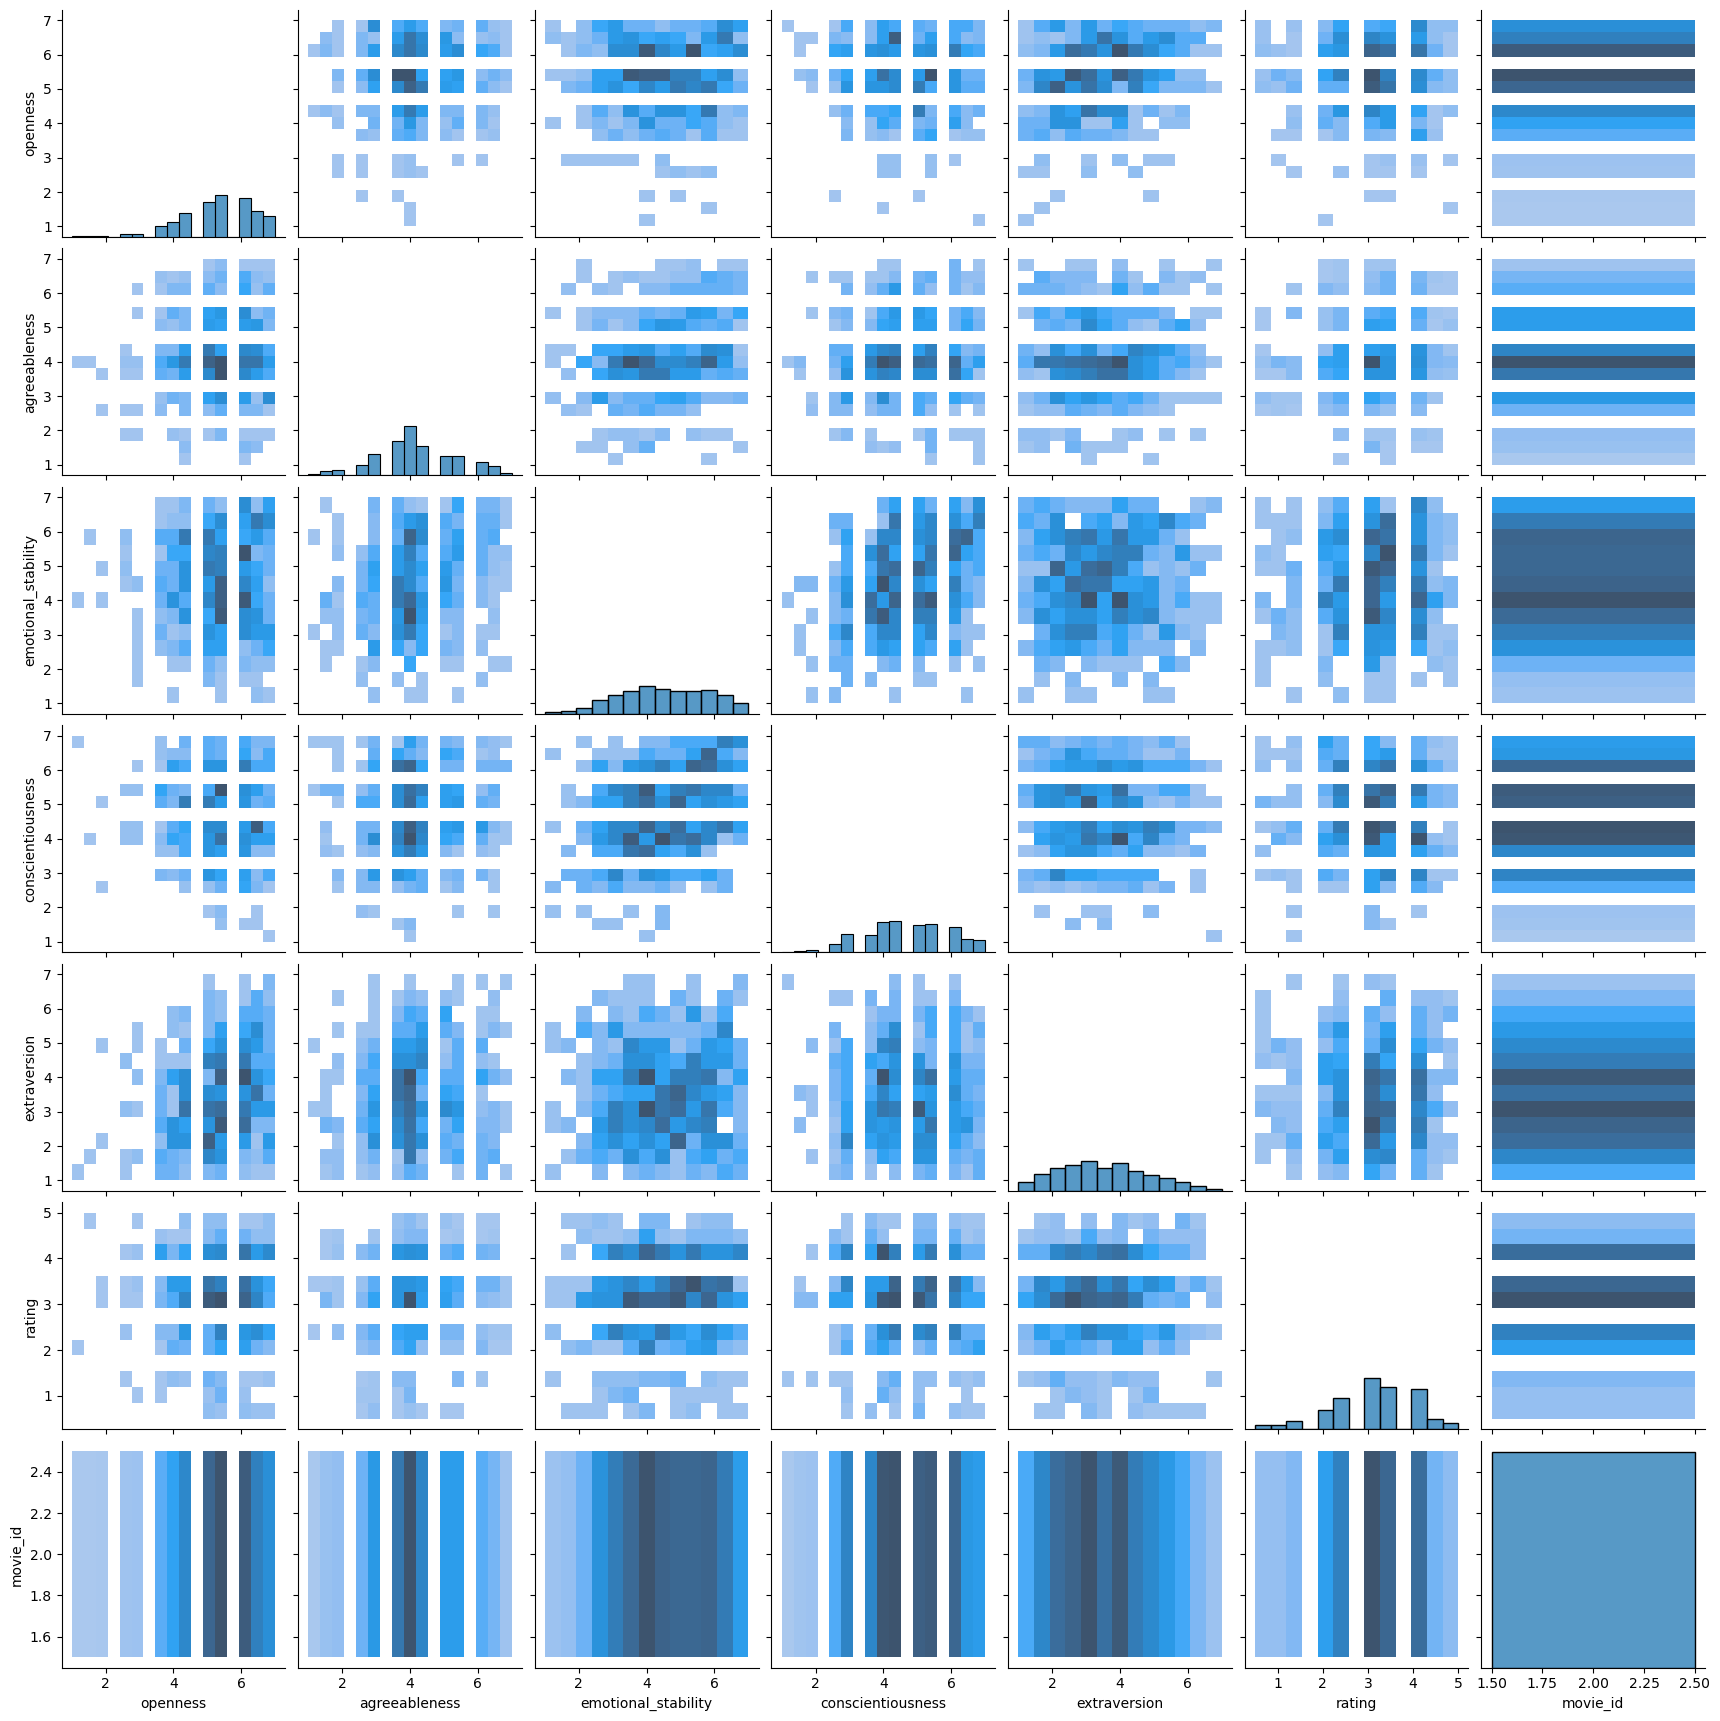

In [11]:
import seaborn as sns

sns.pairplot(data[data["movie_id"] == 2], kind="hist")